In [45]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

import pandas as pd

# Global variables
DATA_PATH = "data"

In [46]:
"""
- Function to load Paparazzi .csv data files -
"""
def load_data(filename, t0, tf):
    data = pd.read_csv(os.path.join(DATA_PATH, filename), sep="\t")
    data = data.loc[(data["Time"] >= t0) & (data["Time"] <= tf)]
    return data

# Loading data
t0, tf = 1600, 3300
filename = "23_11_15__09_16_45_2.csv"

data = load_data(filename, t0, tf)
print(data.shape)
print(data.head())

(6800, 7)
        Time           UTC  GPS_lat(deg)  GPS_long(deg)  ROTORCRAFT_FP:north  \
239  1600.08  08:43:25.080     37.297572      -3.682934                 3368   
240  1600.33  08:43:25.330     37.297572      -3.682934                 3368   
241  1600.58  08:43:25.580     37.297566      -3.682933                 3182   
242  1600.83  08:43:25.830     37.297566      -3.682933                 3182   
243  1601.08  08:43:26.080     37.297559      -3.682932                 3000   

     ROTORCRAFT_FP:east  RSSI:rssi  
239               -4628         63  
240               -4628         61  
241               -4602         63  
242               -4602         64  
243               -4577         60  


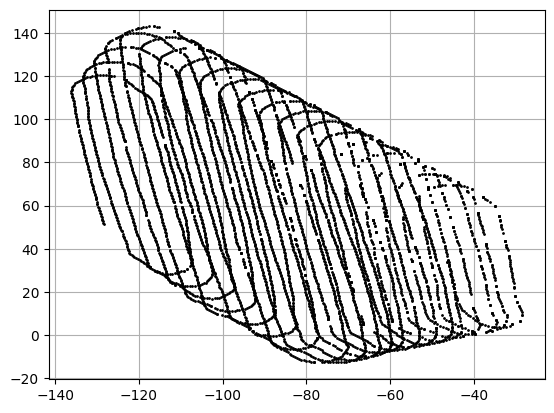

In [47]:
# Procressing the data
data_time = np.array(data["Time"].to_list())
data_rssi =- np.array(data["RSSI:rssi"].to_list())
data_x = np.array(data["ROTORCRAFT_FP:east"].to_list())/100
data_y = np.array(data["ROTORCRAFT_FP:north"].to_list())/100

plt.plot(data_x, data_y, ".k", markersize=2)
plt.grid(True)

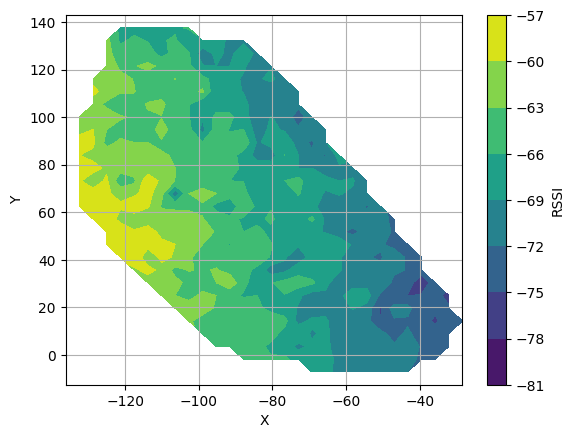

In [58]:
# Generate the heat map
ceils = 30
x = np.linspace(np.min(data_x), np.max(data_x), ceils)
y = np.linspace(np.min(data_y), np.max(data_y), ceils)
grid_x, grid_y = np.meshgrid(x,y)

points = np.array([data_x,data_y]).T
values = data_rssi

grid_z0 = griddata(points, values, (grid_x, grid_y), method='linear').T

plt.contourf(x, y, grid_z0)

plt.ylabel("Y")
plt.xlabel("X")
plt.grid(True)
plt.colorbar(label='RSSI')